In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
# for nice dark theme in Jupyter Notebooks
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import warnings
warnings.filterwarnings('once')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.features.build_features import get_clean_dataset
df = get_clean_dataset()

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
0,18.0,8,307.0,130.0,3504.0,12.0,70,Chevrolet Chevelle Malibu,Chevrolet,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,Buick Skylark 320,Buick,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,Plymouth Satellite,Plymouth,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,Amc Rebel Sst,AMC,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,Ford Torino,Ford,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
year            398 non-null int64
name            398 non-null object
company         398 non-null object
region          398 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 31.2+ KB


Exploratory Data Analysis should be conducted on training set to avoid what's called "data peaking" by making assumption about the test set. Training set should be left to the very end of exloration and modeling to assess assumption on unseen data.

In [6]:
df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     random_state=42,
                                     shuffle=True,
                                    )
df_train.to_csv('../data/interim/df_train_cleaned.csv')
df_test.to_csv('../data/interim/df_test_cleaned.csv')

## Visualize target `mpg` 

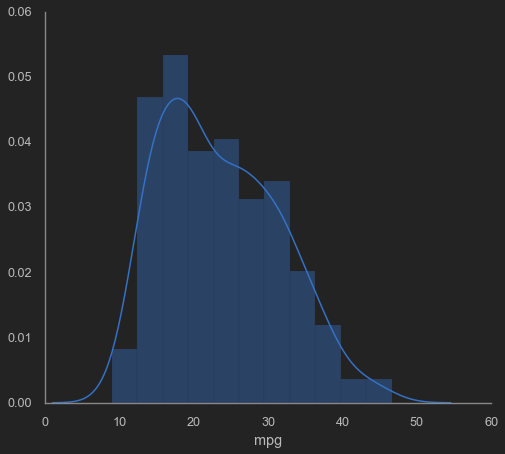

In [9]:
sns.distplot(df_train.mpg)
sns.despine()

## Summay Statistics

In [13]:
# summary of coutinous features
cont_variables = ['mpg',
                 'displacement',
                 'horsepower',
                 'weight',
                 'acceleration']
df_train[cont_variables].describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,318.0,24.0,8.0,9.0,18.0,22.0,30.0,47.0
displacement,318.0,192.0,103.0,68.0,98.0,148.0,260.0,455.0
horsepower,313.0,103.0,37.0,46.0,75.0,92.0,122.0,225.0
weight,318.0,2969.0,841.0,1613.0,2220.0,2822.0,3597.0,5140.0
acceleration,318.0,16.0,3.0,8.0,14.0,16.0,17.0,25.0


In [14]:
# summary of object features
df.describe(include=['O'])

,name,company,region
count,398,398,398
unique,305,30,3
top,Ford Pinto,Ford,USA
freq,6,51,249


## Distribution of continuous features 

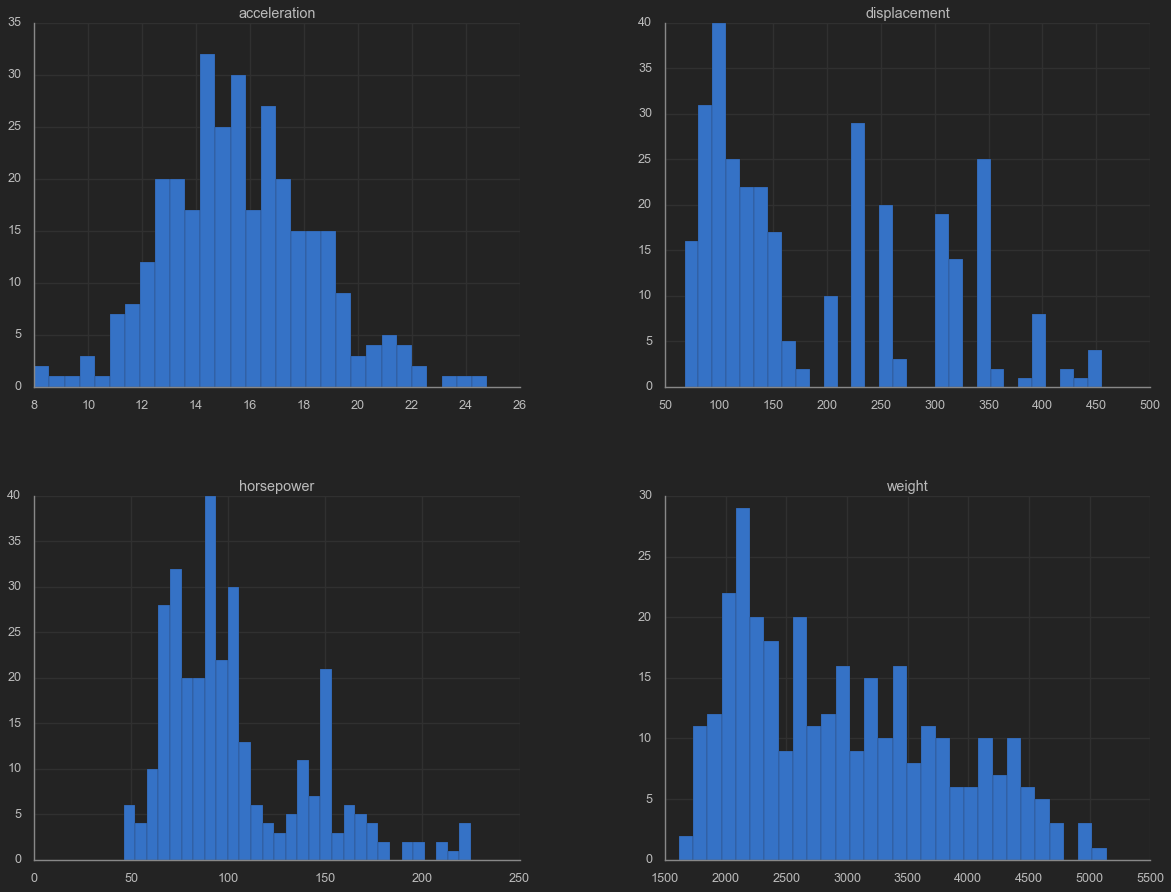

In [27]:
cont_features = ['displacement',
                 'horsepower',
                 'weight',
                 'acceleration']
df_train[cont_features].hist(bins=30, figsize=(20, 15))
sns.despine()

- Some historgams are tail heavy. It can make it harder for some Machine Learning algorithms to detect patterns. We will try to transforms these features to make them more normally distributed.
- Continuous features are distributed on the same scale.
- However, the scale differs from the multi-valued discrete feature `cylinders` (3-8).
Depending on the algorithm, further scaling might be needed.

Horsepower is skewed to the left. It's better to use median strategy to impute the missing values.

## Distribution of categorical features

### Region

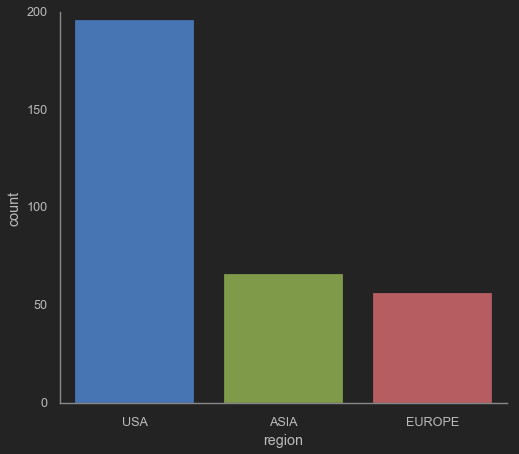

In [400]:
sns.countplot(df_train.region)
sns.despine()

### Year

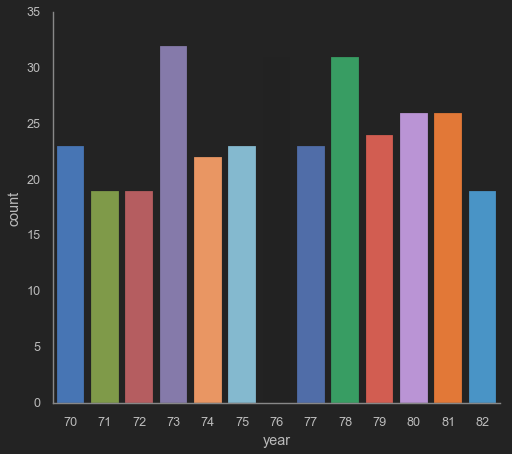

In [23]:
sns.countplot(df_train.year)
sns.despine()

### Cylinders 

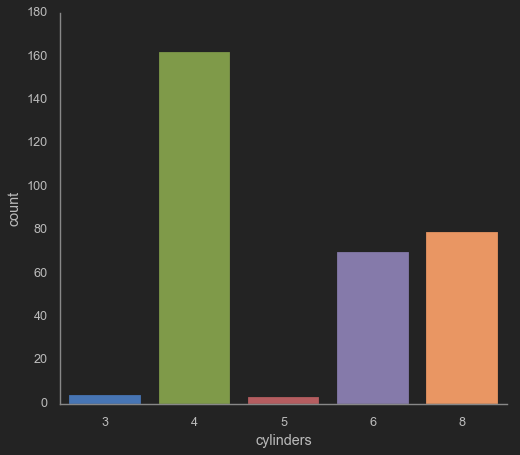

In [24]:
sns.countplot(df_train.cylinders)
sns.despine()

## Look at extreme values 

In [47]:
def get_extreme(df, column):
    extremes = [df[column].min(), df[column].max()]
    return df[ df[column].isin(extremes) ].sort_values(by=column)

### Cars with lowest and highest mpg 

In [48]:
get_extreme(df_train, 'mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
28,9.0,8,304.0,193.0,4732.0,18.5,70,Hi 1200D,Hi,USA
322,46.6,4,86.0,65.0,2110.0,17.9,80,Mazda Glc,Mazda,ASIA


### Cars with lowest and highest horsepower

In [49]:
get_extreme(df_train, 'horsepower')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
19,26.0,4,97.0,46.0,1835.0,20.5,70,Volkswagen 1131 Deluxe Sedan,Volkswagen,EUROPE
102,26.0,4,97.0,46.0,1950.0,21.0,73,Volkswagen Super Beetle,Volkswagen,EUROPE
95,12.0,8,455.0,225.0,4951.0,11.0,73,Buick Electra 225 Custom,Buick,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,Pontiac Catalina,Pontiac,USA
13,14.0,8,455.0,225.0,3086.0,10.0,70,Buick Estate Wagon (Sw),Buick,USA


### Cars with lowest and highest weight

In [50]:
get_extreme(df_train, 'weight')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
54,35.0,4,72.0,69.0,1613.0,18.0,71,Datsun 1200,Datsun,ASIA
44,13.0,8,400.0,175.0,5140.0,12.0,71,Pontiac Safari (Sw),Pontiac,USA


### Cars with lowest and heighest displacement

In [52]:
get_extreme(df_train, 'displacement')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,company,region
117,29.0,4,68.0,49.0,1867.0,19.5,73,Fiat 128,Fiat,EUROPE
95,12.0,8,455.0,225.0,4951.0,11.0,73,Buick Electra 225 Custom,Buick,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,Pontiac Catalina,Pontiac,USA
13,14.0,8,455.0,225.0,3086.0,10.0,70,Buick Estate Wagon (Sw),Buick,USA


## Look for correlations 

In [53]:
corr_matrix = df_train.corr()
corr_matrix["mpg"].sort_values(ascending=True)

weight         -0.827333
displacement   -0.801543
horsepower     -0.772308
cylinders      -0.770459
acceleration    0.390101
year            0.586743
mpg             1.000000
Name: mpg, dtype: float64

#### Visualize weight, displacement, horsepower versus mpg 

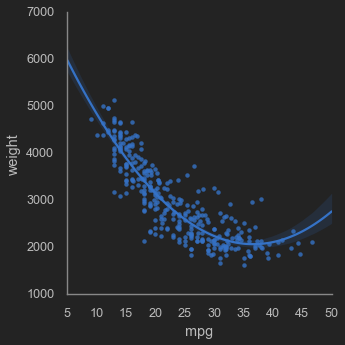

In [55]:
sns.lmplot('mpg', 'weight', df_train, order=2)
sns.despine()

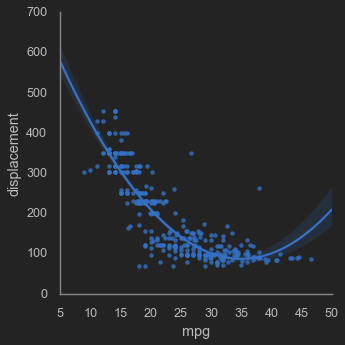

In [57]:
sns.lmplot('mpg', 'displacement', df_train, order=2)
sns.despine()

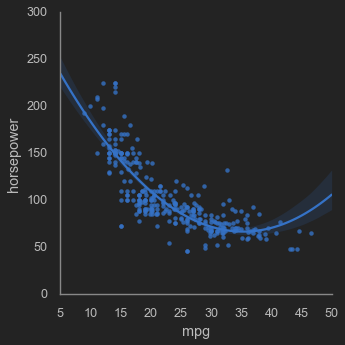

In [63]:
sns.lmplot('mpg', 'horsepower', df_train, order=2)
sns.despine()

The banana shaped data shows a clear non-linaer relationship between each of the features `horsepower`, `displacement`, `weight`, and `mpg`. The plots show a non-linear increase of `mpg`  for increasing vehicule weight, displacement or horsepower.

#### Visualize accelaration and year versus mpg 

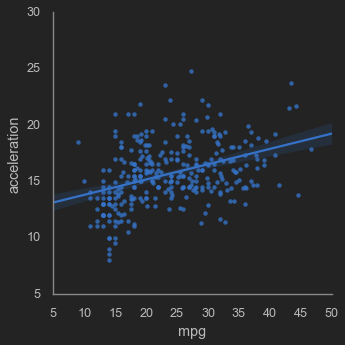

In [66]:
sns.lmplot('mpg', 'acceleration', df_train, order=1)
sns.despine()

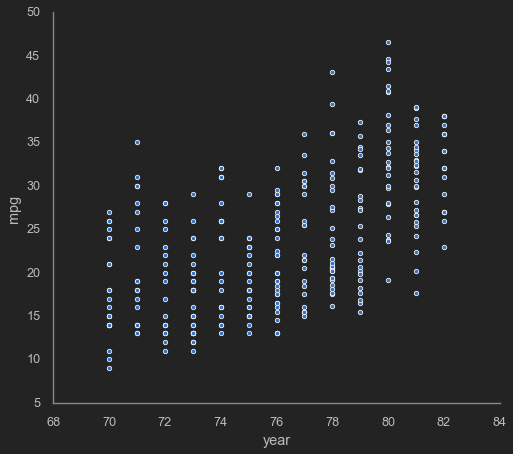

In [59]:
sns.scatterplot(df_train['year'], df_train['mpg'])
sns.despine()

The plots show that a relationship exist between the input features `acceleration` and `year` and the target `mog`. `mpg` seams to incrase linearly with these feature.

#### Visualize cylinders  and  region

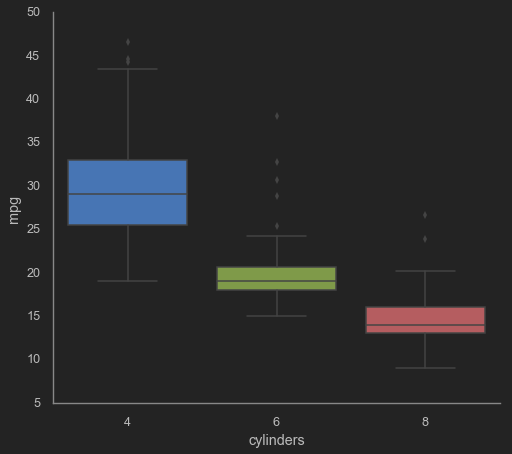

In [74]:
df_cylinders = df_train[~df_train['cylinders'].isin([3, 5])]
sns.boxplot(x='cylinders', y='mpg', data=df_cylinders)
sns.despine()

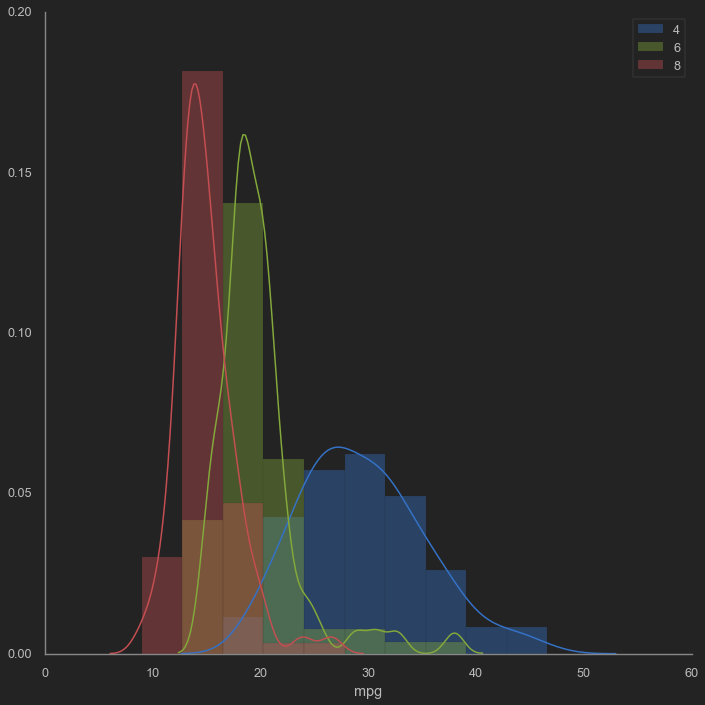

In [76]:
_, bins = np.histogram(df_cylinders['mpg'])
g = sns.FacetGrid(df_cylinders, hue='cylinders', height=10, )
g = g.map(sns.distplot, "mpg", bins=bins, )
plt.legend()
plt.show()

The plots show that a relationship exist between the input features `acceleration` and `year` and the target `mog`. `mpg` seams to incrase linearly with these feature. 

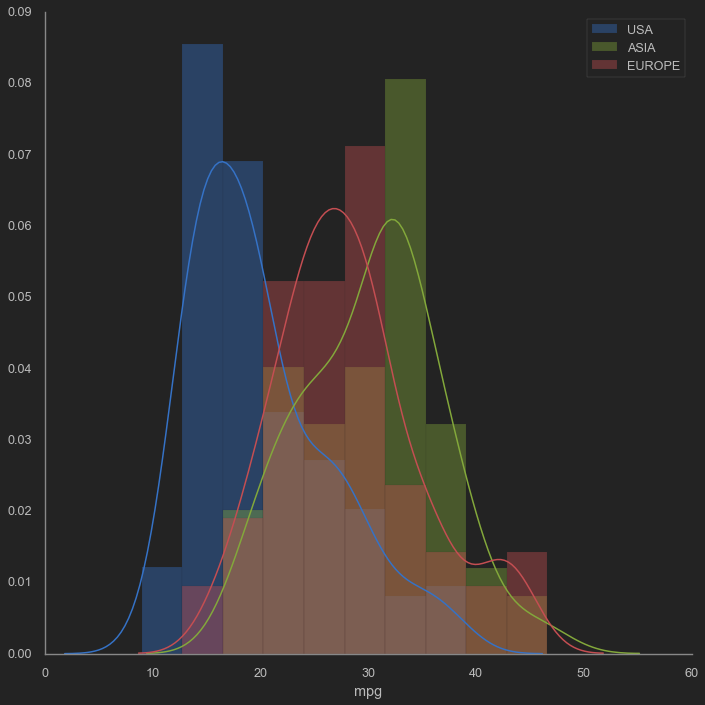

In [60]:
_, bins = np.histogram(df_train['mpg'])
g = sns.FacetGrid(df_train, hue='region', height=10, )
g = g.map(sns.distplot, "mpg", bins=bins, )
plt.legend()
plt.show()

The desity plot shows that a car made in Asia has a higher `mgp` then a car made in Europe on average. A car made in Europe has a higher `mpg` that a car made in USA on avergae.

### Correlations between continous variables

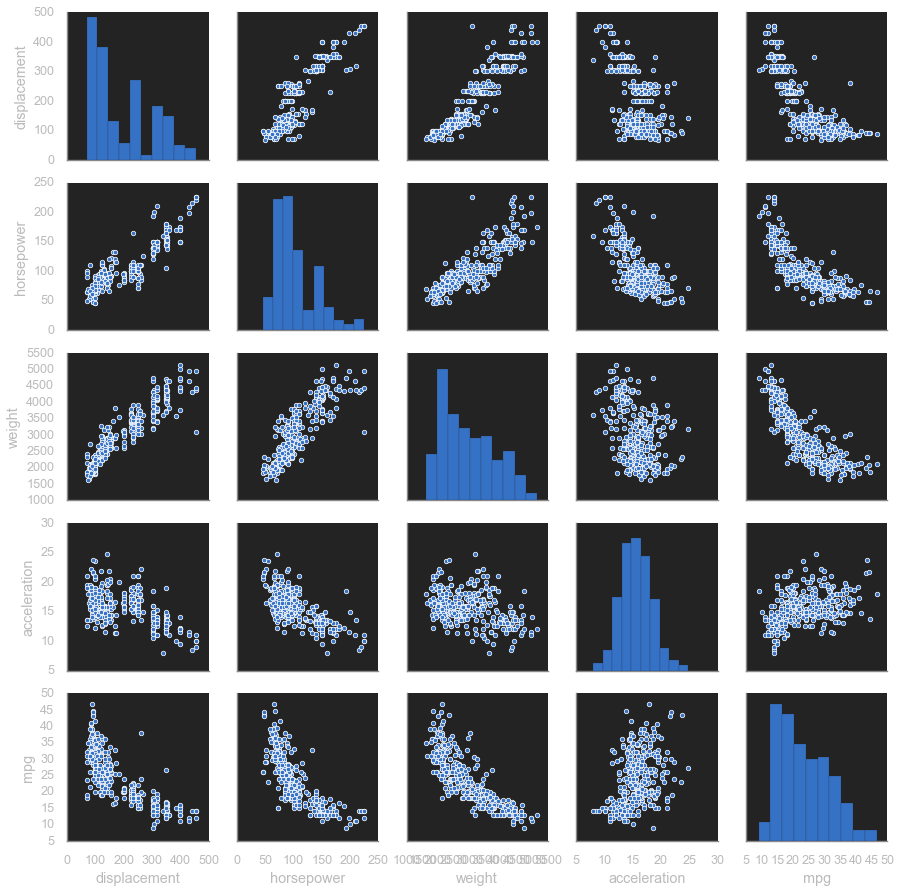

In [229]:
continous = ['displacement',
             'horsepower',
             'weight',
             'acceleration',
             'mpg',]

sns.pairplot(df_train[continous])
plt.show()

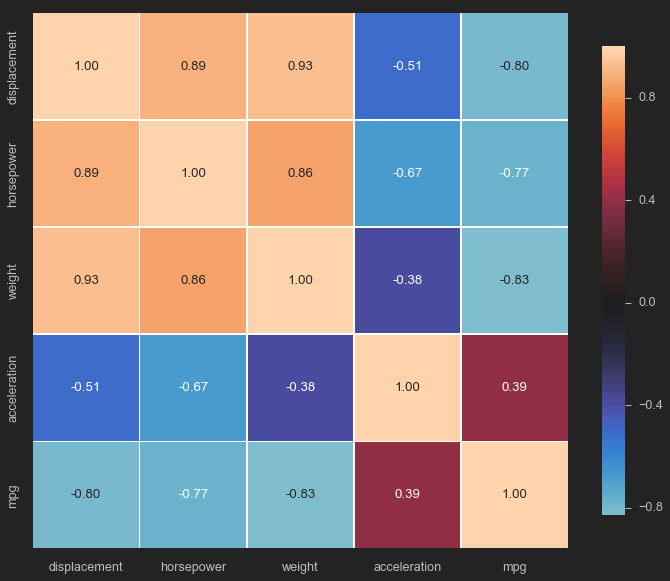

In [235]:
correlations = df_train[continous].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

cylinders, displacement and weight are highly correlated.

mpg is highly correlated to these tree features as well.

-> Can experiment with features selection:
- Keep features that improves predictions
- Use Lasso
- Use feature importance given by random trees
- Use PCA